In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("seaborn-v0_8-darkgrid")  # Use the correct style name for matplotlib >= 3.6
sns.set_palette("muted")

# Load data
data_path = "../data"
tickers = ['AAPL', 'MSFT', 'JNJ', 'PFE']

data = {}
for ticker in tickers:
    file_path = os.path.join(data_path, f"{ticker}.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    df = df[['Close']].rename(columns={'Close': ticker})
    data[ticker] = df

# Merge all tickers into one DataFrame
df_all = pd.concat(data.values(), axis=1)
df_all.dropna(inplace=True)
df_all.head()

,AAPL,MSFT,JNJ,PFE
Date,,,,
NaT,AAPL,MSFT,JNJ,PFE
2015-01-02,24.288578033447266,39.99871063232422,78.01262664794922,19.346155166625977
2015-01-05,23.60433006286621,39.630882263183594,77.46775817871094,19.24118423461914
2015-01-06,23.606552124023438,39.04921340942383,77.08709716796875,19.401735305786133
2015-01-07,23.937578201293945,39.545345306396484,78.78886413574219,19.667253494262695


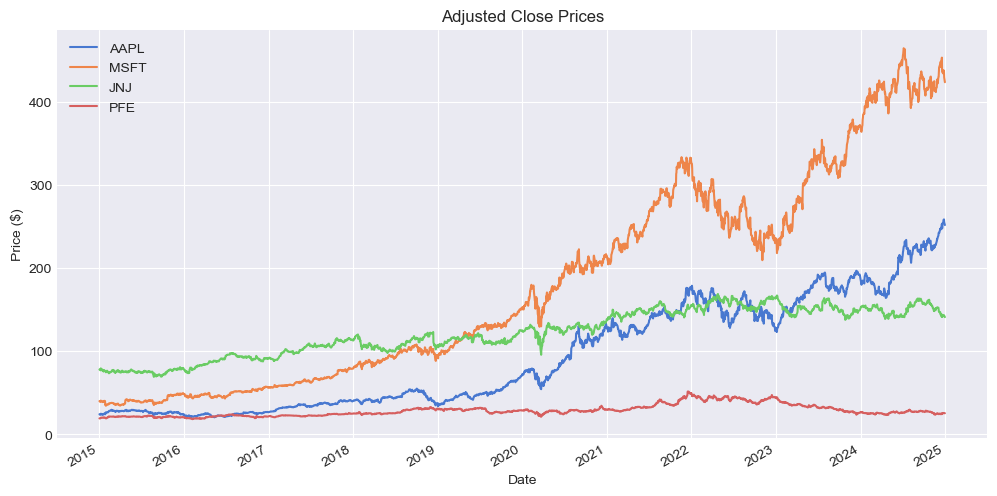

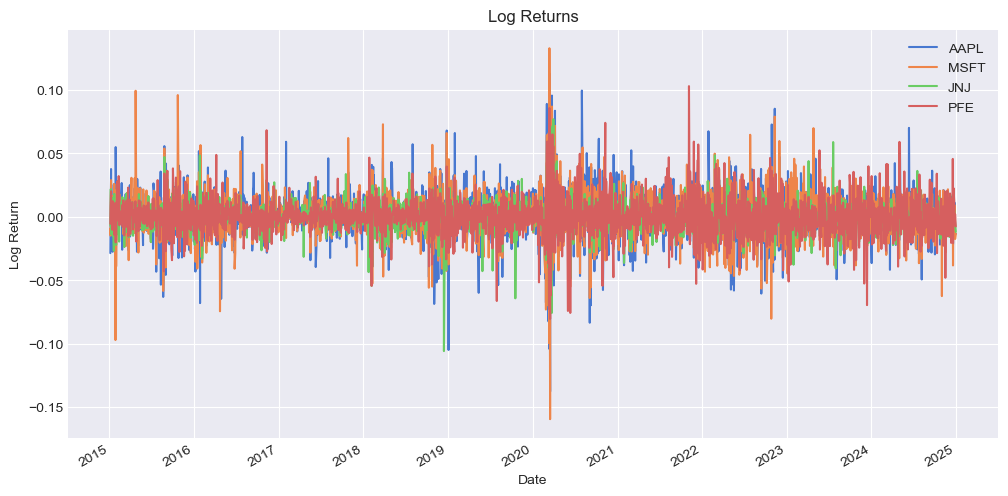

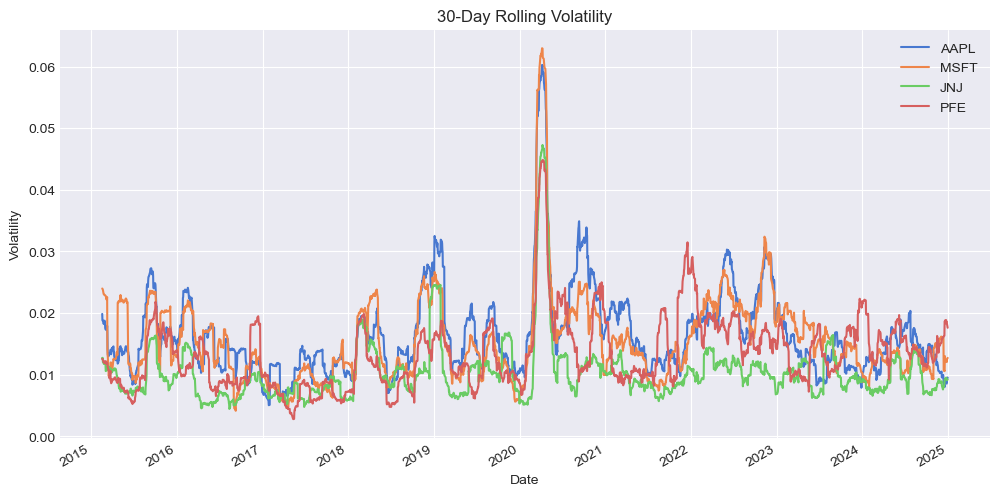

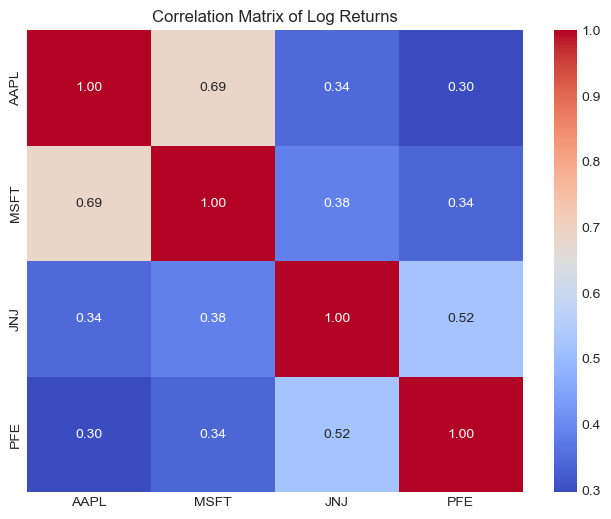

In [10]:
# Ensure numeric data for plotting
df_all_numeric = df_all.apply(pd.to_numeric, errors='coerce')

# Calculate log returns
log_returns = np.log(df_all_numeric / df_all_numeric.shift(1))

# Price Trend
df_all_numeric.plot(figsize=(12, 6), title="Adjusted Close Prices")
plt.ylabel("Price ($)")
plt.show()

# Log Returns
log_returns.plot(figsize=(12, 6), title="Log Returns")
plt.ylabel("Log Return")
plt.show()

# Rolling Volatility
rolling_vol = log_returns.rolling(window=30).std()
rolling_vol.plot(figsize=(12, 6), title="30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(log_returns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Log Returns")
plt.show()